In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
plt.rcParams['figure.figsize'] = (8.0, 8.0)

import miser3 as miser

In [84]:
import importlib
importlib.reload(miser);

In [85]:
# to create 'mep.oct' run from terminal
# bin/mepl lattices/bessarab.lat -o -a0.0093 -e1e-15 -S
sys, mypath, ergy, distance=miser.load_results('../tmp/mep.oct')

In [86]:
contr=sys.lambda_energy_contributions()
print(miser.energy_contributions_names())
print(ergy[0])
print(contr(mypath[0]))

['Anisotropy', 'Zeeman', 'Heisenberg', 'DMI', 'Dipolar', 'Total']
[  -276.09050394   -108.1662804  -15387.44346544   -293.28335353      0.
 -16064.98360331]
[  -276.09050394   -108.1662804  -15387.44346544   -293.28335353      0.
 -16064.98360331]


In [87]:
miser.save_results('../tmp/saved.oct',sys,mypath)

In [74]:
sys2, mypath2, ergy2, distance2=miser.load_results('../tmp/saved.oct')

In [75]:
hessian=sys.lambda_hessian()
contr=sys.lambda_energy_contributions()

In [76]:
for n in range(mypath.shape[0]):
    e=sys.energy(mypath[n], hessian(mypath[n]))[0]
    e2=contr(mypath[n])[-1]
    print(e, e2, ergy[n,-1])
print('Barrier', np.max(ergy[:,-1])-ergy[0,-1])

-16064.9836033 -16064.9836033 -16064.9836033
-16062.7577859 -16062.7577859 -16062.7577859
-16055.5619654 -16055.5619654 -16055.5619654
-16046.562261 -16046.562261 -16046.562261
-16034.6573812 -16034.6573812 -16034.6573812
-16013.7394041 -16013.7394041 -16013.7394041
-15970.5902191 -15970.5902191 -15970.5902191
-16024.240494 -16024.240494 -16024.240494
-16044.6146402 -16044.6146402 -16044.6146402
-16052.9945953 -16052.9945953 -16052.9945953
-16058.0507905 -16058.0507905 -16058.0507905
-16068.9410822 -16068.9410822 -16068.9410822
-16096.4762876 -16096.4762876 -16096.4762876
Barrier 94.3933842291


In [25]:
hess0, N0, embed0, project0, ergy0, grad0=sys.lambda_restricted_hessian(mypath[0], hessian=hessian)
saddle_idx=np.argmax(ergy[:,-1]); saddle=mypath[saddle_idx]
hessS, NS, embedS, projectS, ergyS, gradS=sys.lambda_restricted_hessian(saddle, hessian=hessian)

Gradient at minimum 0.0
Gradient at saddle point 9.89033631117e-14


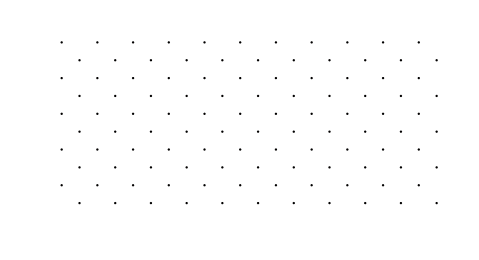

In [26]:
pgrad0=miser.project_to_tangent_space(mypath[0], grad0)
print('Gradient at minimum', np.sqrt(np.sum(pgrad0**2)))
pgradS=miser.project_to_tangent_space(saddle, gradS)
print('Gradient at saddle point', np.sqrt(np.sum(pgradS**2)))
sys.plot_field(pgradS)
plt.show()

In [27]:
M0=miser.matrix(hess0)
MS=miser.matrix(hessS)

In [28]:
eig0, eiv0=np.linalg.eigh(M0)
eigS, eivS=np.linalg.eigh(MS)

In [29]:
print('Hessian lowest eigenvalues')
print('Minimum', eig0[:5])
print('Saddle', eigS[:5])

Hessian lowest eigenvalues
Minimum [ 2.4         3.42614127  6.4644432   8.29336489  8.4       ]
Saddle [-0.34581919  2.04028202  4.31128295  5.59656354  6.        ]


In [30]:
data0=sys.restricted_harmonic(mypath[0], hessian=hessian)
dataS=sys.restricted_harmonic(saddle, hessian=hessian)

In [34]:
ergy0, pei0, nei0, c0, zei0, zev0=data0
ergyS, peiS, neiS, cS, zeiS, zevS=dataS

print('Minimum {} {} {}'.format(nei0,zei0,pei0[:3]))
print('Saddle {} {} {}'.format(neiS,zeiS,peiS[:3]))

Minimum None None [ 2.4         3.42614127  6.4644432 ]
Saddle [-0.34581919] None [ 2.04028202  4.31128295  5.59656354]


In [35]:
print(pei0.shape, peiS.shape)
print(np.sqrt(np.prod(pei0[1:]/peiS)*pei0[0]))
print(np.sqrt(np.sum(cS*cS*peiS)))
print(np.sqrt(np.sum(cS*cS/peiS)))

(188,) (187,)
137.805121875
2.45002114873
0.408232304674


In [41]:
# Магнетон Бора
muB=5.7883818066E-2 # meV/T
# Постоянная Планка
hbar=6.582119514E-13 # meV*s
# Магнитный момент
mu=2*muB
# Гиромагнитное отношение
gamma=mu/hbar
gammaovermu=gamma/mu
# Константа Больцмана
kB=8.6173303E-2 # meV/K
print('mu={:e} meV/T'.format(mu))
print('gamma/mu={:e} Hz/meV'.format(gammaovermu))
print(1/hbar)

mu=1.157676e-01 meV/T
gamma/mu=1.519267e+12 Hz/meV
1519267460691.0823


In [42]:
# gamma = 2*mu_B/hbar = 2*mu_B/(6.5821195E-13 meV*s)=0.3038534E13 mu_B/(meV*s)
# mu = 2 mu_B.

rate=miser.rate(data0, dataS, gammaovermu=1/hbar)
print('Pre-exp {:e}={}'.format(np.prod(rate[:-1]),rate[:-1]))
print('Pavel value {:e}'.format(8.1637E13))

Pre-exp 8.163747e+13=[  2.41798926e+11   1.00000000e+00   1.37805122e+02   2.45002115e+00]
Pavel value 8.163700e+13


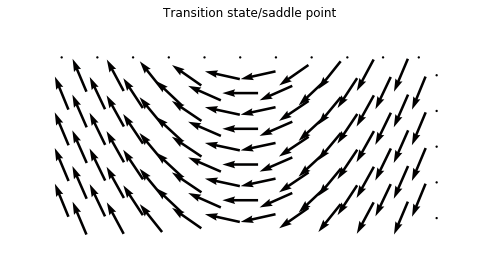

In [18]:
sys.plot_field(mypath[np.argmax(ergy[:,-1])])
plt.title('Transition state/saddle point')
plt.show()

In [19]:
sys.plot_path(mypath)

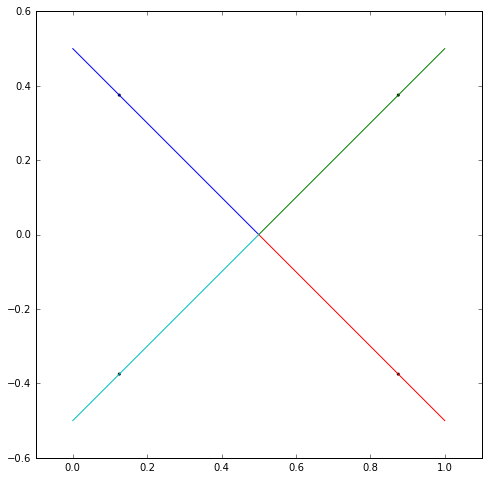

In [16]:
sys.plot_stencil()
plt.show()

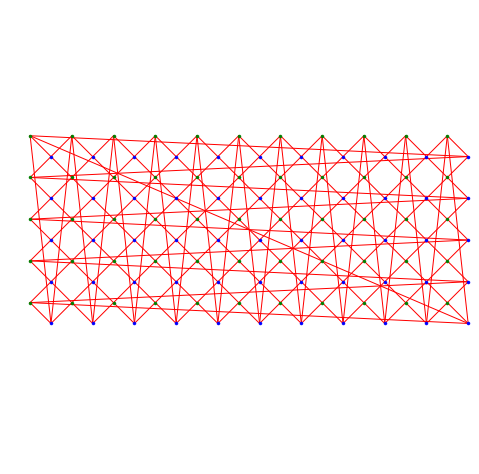

In [17]:
sys.plot()
plt.show()

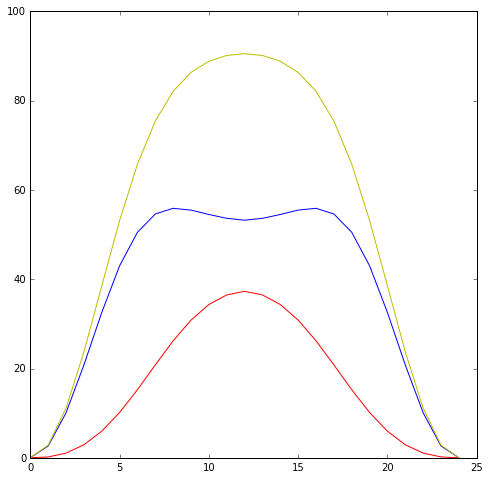

In [18]:
plt.plot(ergy-ergy[-1,:])
plt.show()